# <font color='red'>**F√≠sica Estad√≠stica Avanzada**</font>

## <font color='orange'>**Tarea Computacional #2: Quantum Monte Carlo. Part√≠cula en un potencial arm√≥nico**</font>

## <font color='lime'>**Santiago Ruiz Piedrahita**</font>
## <font color='lime'>**Juan Sebasti√°n Ramirez Quintero**</font>

<font color='lime'>Instituto de F√≠sica, Facultad de Ciencias Exactas y Naturales, Universidad de Antioquia UdeA, Calle 70 No. 52-21, Medell√≠n, Colombia.</font>

 # **Resumen**  

 En este trabajo se desarroll√≥ un programa computacional con el prop√≥sito de estudiar el comportamiento de una part√≠cula cu√°ntica confinada en un potencial arm√≥nico unidimensional, utilizando el algoritmo de Monte Carlo de cadenas de Markov (Metropolis). El enfoque se centr√≥ en analizar c√≥mo var√≠a la distribuci√≥n de probabilidad de la posici√≥n de la part√≠cula en funci√≥n de la temperatura y del n√∫mero cu√°ntico del estado. Se implementaron simulaciones num√©ricas que permiten contrastar la distribuci√≥n cu√°ntica obtenida con la correspondiente distribuci√≥n cl√°sica de equilibrio. Para ello, se generaron histogramas de posici√≥n que revelan la estructura de las funciones de onda cu√°nticas y su dependencia t√©rmica, permitiendo observar la transici√≥n desde un comportamiento puramente cu√°ntico a uno m√°s cl√°sico a medida que aumenta la temperatura. Los resultados obtenidos permiten visualizar las diferencias fundamentales entre los reg√≠menes cl√°sico y cu√°ntico dentro del contexto de sistemas confinados arm√≥nicamente.

 ## **palabras claves.**

 *  Monte Carlo, Potencial arm√≥nico, Distribuci√≥n de probabilidad


 # **Introducci√≥n**

 El comportamiento cu√°ntico de una part√≠cula confinada en un potencial arm√≥nico es un problema fundamental en la mec√°nica cu√°ntica, con aplicaciones que van desde osciladores moleculares hasta circuitos cu√°nticos. El Hamiltoniano correspondiente en una dimensi√≥n est√° dado por:

\begin{equation}
    \hat{H} = \frac{\hat{p}^2}{2m} + \frac{1}{2} m\omega^2 x^2
\end{equation}

donde $\hat {p}$
es el operador momento, y su soluci√≥n implica resolver la ecuaci√≥n de Schr√∂dinger independiente del tiempo. Las funciones de onda asociadas a cada nivel de energ√≠a $n$ ( $\psi_n(x)$) se expresan mediante polinomios de Hermite, permitiendo obtener la densidad de probabilidad cu√°ntica $  \pi(x) = |\psi_n(x)|^2 $

Este trabajo utiliza el m√©todo de Monte Carlo con cadenas de Markov, espec√≠ficamente el algoritmo de Metropolis, para muestrear posiciones
$x$ con distribuciones de probabilidad tanto cu√°nticas como cl√°sicas. A temperatura cero, se simula el estado base de la part√≠cula, cuya funci√≥n de onda est√° dada por:

\begin{equation}
    \psi_0(x) = \left(\frac{1}{\pi^{1/4}}\right) ~ exp\left(-\frac{x^2}{2}\right)
\end{equation}

mientras que a temperatura finita se considera la mezcla t√©rmica de estados excitados, ponderados por sus respectivos factores de Boltzmann.

Por otro lado, el comportamiento cl√°sico se describe mediante la distribuci√≥n

\begin{equation}
    \pi(x) \sim exp\left(\frac{-\beta x^2}{2}\right)
\end{equation}

lo que permite una comparaci√≥n directa entre los dos reg√≠menes.

A lo largo del trabajo se realizar√°n simulaciones para obtener histogramas de posici√≥n, los cuales se comparar√°n con las distribuciones te√≥ricas, permitiendo analizar la transici√≥n entre el comportamiento cl√°sico y cu√°ntico en funci√≥n de la temperatura. Esto no solo ilustra la eficacia del algoritmo de Metropolis en sistemas f√≠sicos simples, sino que tambi√©n brinda una comprensi√≥n m√°s intuitiva de conceptos fundamentales de la mec√°nica estad√≠stica cu√°ntica.

In [ ]:
#Importamos Librerias
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

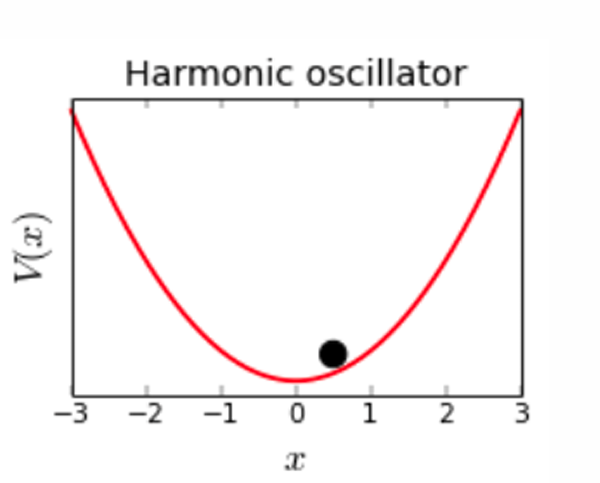

# <font color='orange'>**Part√≠cula en un potencial arm√≥nico con $T \rightarrow 0$** </font>

Inicialmente consideremos una part√≠cula en un potencial arm√≥nico $V(x) = \frac{x^2}{2}$ (con unidades reducidas) a muy baja temperatura, es decir, en el l√≠mite $T \rightarrow 0$.


* La probabilidad $œÄ(x)$ de una part√≠cula cl√°sica en un potencial arm√≥nico a una temperatura $T = \frac{1}{Œ≤}$ est√° dada por: $œÄ(x) ‚àº exp(\frac{-Œ≤x^2}{2})$.

  Ahora, matem√°ticamente podemos ver que al tomar el l√≠mite cuando $T‚Üí 0$ la distribuci√≥n de probabilidad de una part√≠cula se comporta como una delta de dirac respecto a la posici√≥n $x$, como se observa a continuaci√≥n:

  $$
  Lim_{T‚Üí0}\pi(x)= Lim_{\beta‚Üí\infty}\pi(x) ‚àº  Lim_{\beta‚Üí\infty}exp(-\frac{\beta x^2}{2}) = \delta(x)  
  $$

   Es decir, la particula tiene probabilidad $1$ en $x=0$ y $0$ en otras posiciones. De esto se concluye que dicha part√≠cula est√° localizada e inmovil en esta posici√≥n ($x=0$) y por tanto su energ√≠a es m√≠nima ya que corresponde a la energ√≠a del estado base.

Por otro lado, como se ha mencionado antes la funci√≥n de onda del estado base de una part√≠cula cu√°ntica en dicho potencial arm√≥nico es $œà_0(x) = (\frac{1}{œÄ^{1/4}}) exp(\frac{‚àíx^2}{2})$, y por tanto, su probabilidad asociada est√° dada por $œÄ(x) = |œà_0(x)|^2$
En las siguientes celda de c√≥digo se partio y modifico el programa dado (Markov-chain Monte Carlo Metropolis algorithm) para muestrear las posiciones $x$ con probabilidad $œÄ(x)$. Definiendo as√≠ la funci√≥n para $|œà_0(x)|^2$ y dando como salida un histograma normalizado de las posiciones de la part√≠cula, el cual fue comparado con la funci√≥n $œÄ(x) = |œà0(x)|^2$ teorica conocida.


Para esto se construyo una clase constructora denominada `HarmonicOscillatorMC`, la cual se inicializa con los par√°metros `delta`,`n_steps` y `x_0`, es decir, el salto m√°ximo entre posiciones en cada iteraci√≥n, el n√∫mero total de iteraciones y la posici√≥n inicial respectivamente. Esta clase posee los siguientes m√©todos que permiten el desarrollo del histograma deseado:

* `potential`: Esta funci√≥n devuelve el valor del potencial en funci√≥n de la posici√≥n x.
*`wave_function`: Esta funci√≥n devuelve el valor de la funci√≥n onda fundamental del oscilador arm√≥nico en una posici√≥n x dada.
*`temperature`: Retorna la temperatura dado un valor de $\beta$
* `probability_density`:  Esta funci√≥n calcula la densidad de probabilidad cu√°ntica en la posici√≥n x.
*`metropolis_sampling`:  Este m√©todo realiza el muestreo de la posici√≥n de la part√≠cula en el potencial arm√≥nico. Genera una nueva posici√≥n aleatoria en cada paso, y decide si aceptarla o no bas√°ndose en un criterio probabilistico que compara los valores de la funci√≥n de onda  en la posici√≥n anterior y nueva.
*`plot_results`: Este m√©todo crea un gr√°fico comparando los resultados obtenidos por el muestreo de Monte Carlo con la densidad de probabilidad te√≥rica para el oscilador arm√≥nico.

# <font color='orange'>**Soluci√≥n**</font>

In [ ]:
class HarmonicOscillatorMC:
    def __init__(self, delta=0.5, n_steps=100000):
        """
        Constructor de la clase.

        Inicializa los par√°metros del algoritmo de Monte Carlo:
        - delta: tama√±o m√°ximo del paso aleatorio para el muestreo.
        - n_steps: n√∫mero total de pasos que se ejecutar√°n en el algoritmo de Metropolis-Hastings.
        """
        self.delta = delta
        self.n_steps = n_steps
        self.x = 0.0  # posici√≥n inicial de la part√≠cula en el espacio
        self.x_samples = []  # lista donde se guardar√°n las posiciones muestreadas aceptadas

    def potential(self, x):
        """
        Potencial arm√≥nico: V(x) = (1/2)x^2

        Esta funci√≥n devuelve el valor del potencial en funci√≥n de la posici√≥n x.
        """
        return 0.5 * x**2

    def wave_function(self, x):
        """
        Funci√≥n de onda fundamental del oscilador arm√≥nico.

        La funci√≥n de onda œà‚ÇÄ(x) se define como: œà‚ÇÄ(x) = (1/œÄ)^(1/4) * exp(-x¬≤/2)
        Esta es la forma exacta para el estado fundamental del oscilador arm√≥nico.
        """
        return 1 / np.pi**0.25 * np.exp(-1*self.potential(x))

    def temperature(self, beta):
        """
        Relaci√≥n entre la temperatura T y el par√°metro Œ≤.

        La temperatura est√° dada por: T = 1 / Œ≤.
        """
        return 1 / beta

    def probability_density(self, x):
        """
        Densidad de probabilidad: œÄ(x) = |œà‚ÇÄ(x)|¬≤

        Esta funci√≥n calcula la densidad de probabilidad cu√°ntica en la posici√≥n x.
        Utiliza el cuadrado del valor absoluto de la funci√≥n de onda fundamental.
        """
        return abs(self.wave_function(x))**2

    def metropolis_sampling(self):
        """
        Algoritmo de muestreo de Metropolis-Hastings para Monte Carlo.

        Este m√©todo realiza el muestreo de la posici√≥n de la part√≠cula en el potencial arm√≥nico.
        Genera una nueva posici√≥n aleatoria en cada paso, y decide si aceptarla o no
        bas√°ndose en un criterio probabilistico que compara los valores de la funci√≥n de onda  en la posici√≥n anterior y nueva.
        """
        x = self.x  # inicializamos la posici√≥n en el punto inicial
        for _ in range(self.n_steps):
            # Proponer un nuevo valor en el intervalo [x - delta, x + delta]
            x_new = x + random.uniform(-self.delta, self.delta)

            # Aceptaci√≥n con probabilidad min(1, œÄ(x_new)/œÄ(x)), seg√∫n el algoritmo de Metropolis
            if random.uniform(0.0, 1.0) < self.probability_density(x_new) / self.probability_density(x):
                x = x_new  # aceptamos el nuevo valor de la posici√≥n

            # Guardamos la posici√≥n actual, aceptada o no
            self.x_samples.append(x)

    def plot_results(self):
        """
        Genera el histograma de los valores muestreados y la funci√≥n de probabilidad te√≥rica.

        Este m√©todo crea un gr√°fico comparando los resultados obtenidos por el muestreo
        de Monte Carlo con la densidad de probabilidad te√≥rica para el oscilador arm√≥nico.
        """
        # Crear el histograma de las posiciones muestreadas
        plt.hist(self.x_samples, bins=100, density=True, color='b', edgecolor='black', label='MCMM')

        # Generar los valores de x para graficar la funci√≥n te√≥rica
        x_vals = np.linspace(-4, 4, 1000)
        plt.plot(x_vals, self.probability_density(x_vals), label='Te√≥rico ajustado', linewidth=3, color='crimson')

        # Etiquetas y t√≠tulo del gr√°fico
        plt.xlabel('$x$')
        plt.ylabel('$\pi(x) = |œà_0(x)|^2$')
        plt.title('Densidad de probabilidad para una part√≠cula a $T \\rightarrow 0$ K')
        plt.legend()
        plt.show()

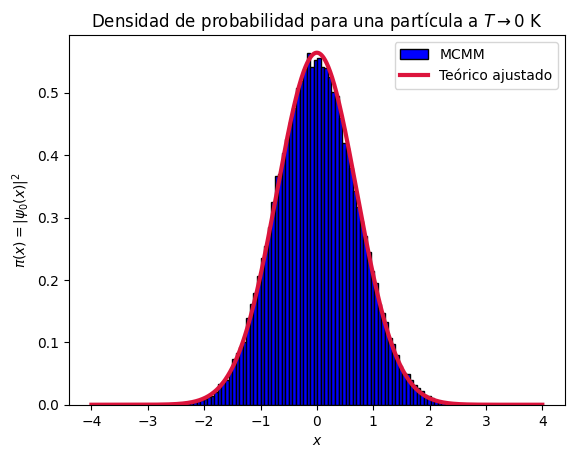

In [ ]:
# Crear una instancia de la clase
simulation = HarmonicOscillatorMC(delta=0.5, n_steps=100000)

# Ejecutar el muestreo de Monte Carlo
simulation.metropolis_sampling()

# Graficar los resultados obtenidos
simulation.plot_results()

En los resultados obtenidos a partir del programa construido se aprecia que efectivamente la distribuci√≥n densidad de la part√≠cula a $T‚Üí 0$ concuerda con una distribuci√≥n normal acorde con lo esperado te√≥ricamente $\rho(x,x,\beta)= |\psi_0(x)|^2$. Donde, este comportamiento es consistente con el principio de m√≠nima energ√≠a, seg√∫n el cual, a temperaturas muy bajas, el sistema tiende a ocupar preferencialmente el estado de menor energ√≠a disponible.

# <font color='orange'> **Part√≠cula en un potencial arm√≥nico a temperatura finita.** </font>

En este caso, la probabilidad para dicha part√≠cula cu√°ntica de estar en un estado $n$ y una posici√≥n $x$ es:

$$œÄ(n, x) ‚àù |œà_n(x)|^2~exp(‚àíŒ≤E_n)$$

con $E_n = n + \frac{1}{2}$ y las funciones de onda $œà_n(x)$ se pueden obtener de manera recursiva con base en los polinomios de Hermite:


Para el estudio del efecto de considerar temperatura finita, se modifico la clase creada anteriormente para simular un oscilador arm√≥nico a temperatura finita $T = \frac{1}{Œ≤}$. Para ello, se consideraron transiciones en  primer lugar desde $(n, x)$ a $(n, x')$ con una probabilidad de aceptacion de Metropolis dada por:

  $p(x \rightarrow x') = min(1, |\frac{œà_n(x')}{œà_n(x)}|^2)$ </font>

Adicional a esto se a√±adieron transiciones entre niveles de energ√≠a del tipo $n \rightarrow m = n¬±1$ manteniendo $x$ fijo con probabilidad dada por:

  $p(n \rightarrow m) = min(1, |\frac{œà_m(x)}{œà_n(x)}|^2~exp(‚àíŒ≤\Delta E))$ </font>

y teniendo en cuenta que transiciones con $m < 0$ son propuestas pero siempre rechazadas.

Para esto se construyo una clase constructora denominada `QuantumHarmonicOscillator`, la cual se inicializa con los par√°metros `delta`,`n_steps` y `beta_x`, es decir, el salto m√°ximo entre posiciones en cada iteraci√≥n, el n√∫mero total de iteraciones y el inverso de la temperatura a considerar. Esta clase posee los siguientes m√©todos que permiten el desarrollo del estudio deseado:

* `ground_state_wavefunction`: Funci√≥n de onda del estado base del oscilador arm√≥nico.
*`wave_function`: Funci√≥n de onda del oscilador arm√≥nico para el estado n usando recurrencia.
*`energy`: Retorna la energ√≠a del estado n del oscilador arm√≥nico.
* `quantum_probability`:  Esta funci√≥n calcula la distribuci√≥n de probabilidad cu√°ntica teorica en una posicion x.
*`classical_probability`: Esta funci√≥n calcula la distribuci√≥n de probabilidad cl√°sica (aproximaci√≥n a alta temperatura) en una posici√≥n x.
*`run_metropolis_mcmc`:  Ejecuta el algoritmo de Metropolis MCMC para muestrear posiciones y niveles de energ√≠a del oscilador arm√≥nico cu√°ntico.
*`plot_results`:  Genera gr√°ficos comparativos entre la distribuci√≥n obtenida por MCMC y las distribuciones te√≥ricas cu√°ntica y cl√°sica para el valor de Œ≤ definido en la instancia.

La codificaci√≥n de esta clase se aprecia a continuaci√≥n:


In [ ]:
class QuantumHarmonicOscillator:
    def __init__(self, beta_x, delta=0.5, n_steps=100000):
        """
        Inicializa el oscilador arm√≥nico cu√°ntico.

        Par√°metros:
        - beta_x: inversa de la temperatura (1/kT).
        - delta: tama√±o del paso propuesto en x (para MCMC).
        - n_steps: n√∫mero de pasos para la simulaci√≥n Monte Carlo.
        """
        self.beta_x = beta_x
        self.delta = delta
        self.n_steps = n_steps

    def ground_state_wavefunction(self, x):
        """
        Funci√≥n de onda del estado base del oscilador arm√≥nico.

        Par√°metros:
        - x: posici√≥n.

        Retorna:
        - Valor de la funci√≥n de onda del estado base en x.
        """
        return np.exp(-x**2 / 2.0) / np.pi**0.25

    def wavefunction(self, x, n_state):
        """
        Funci√≥n de onda del oscilador arm√≥nico para el estado n usando recurrencia.

        Par√°metros:
        - x: posici√≥n.
        - n_state: n√∫mero cu√°ntico del estado deseado.

        Retorna:
        - Valor de la funci√≥n de onda para el estado n en x.
        """
        psi_ = [self.ground_state_wavefunction(x)]  # Estado base
        psi_.append(np.sqrt(2.0) * x * psi_[0])  # Primer estado excitado
        for n in range(2, n_state + 1):  # Estados excitados superiores usando recurrencia
            psi_.append(np.sqrt(2.0/n) * x * psi_[n-1] - np.sqrt((n-1.0)/n) * psi_[n-2])
        return psi_[n_state]

    def energy(self, n):
        """
        Energ√≠a del estado n del oscilador arm√≥nico.

        Par√°metros:
        - n: n√∫mero cu√°ntico.

        Retorna:
        - Energ√≠a del estado n.
        """
        return n + 0.5  # F√≥rmula de energ√≠a en unidades naturales

    def quantum_probability(self, x):
        """
        Distribuci√≥n de probabilidad cu√°ntica exacta.

        Par√°metros:
        - x: posici√≥n.

        Retorna:
        - Valor de la distribuci√≥n de probabilidad cu√°ntica en x.
        """
        return np.sqrt(np.tanh(0.5 * self.beta_x) / np.pi) * np.exp(-x**2 * np.tanh(0.5 * self.beta_x))

    def classical_probability(self, x):
        """
        Distribuci√≥n de probabilidad cl√°sica (aproximaci√≥n a alta temperatura).

        Par√°metros:
        - x: posici√≥n.

        Retorna:
        - Valor de la distribuci√≥n de probabilidad cl√°sica en x.
        """
        return np.sqrt(self.beta_x / (2 * np.pi)) * np.exp(-0.5 * x**2 * self.beta_x)

    def run_metropolis_mcmc(self):
        """
        Ejecuta el algoritmo de Metropolis MCMC para muestrear posiciones y niveles de energ√≠a
        del oscilador arm√≥nico cu√°ntico.

        Retorna:
        - Una lista de pares [x, n]:
            x: posici√≥n aceptada.
            n: estado cu√°ntico correspondiente.
        """
        x = 0.0  # Posici√≥n inicial
        n = 0    # Estado cu√°ntico inicial
        samples = []  # Lista para almacenar los pares [x, n]

        for _ in range(self.n_steps):
            # Proponer nuevo valor de x
            x_new = x + random.uniform(-self.delta, self.delta)

            # Aceptar nuevo x con probabilidad basada en el cociente de funciones de onda
            if random.uniform(0.0, 1.0) < min(1, abs(self.wavefunction(x_new, n) / self.wavefunction(x, n))**2):
                x = x_new

            # Proponer un cambio de nivel de energ√≠a n ‚Üí n ¬± 1
            n_new = n + (-1)**random.randint(0, 1)
            if n_new >= 0:
                E_new = self.energy(n_new)
                E_old = self.energy(n)
                prob = abs(self.wavefunction(x, n_new) / self.wavefunction(x, n))**2 * np.exp(-self.beta_x * (E_new - E_old))

                # Aceptar el nuevo estado con cierta probabilidad
                if random.uniform(0.0, 1.0) < min(1, prob):
                    n = n_new

            # Guardar la muestra actual [x, n]
            samples.append([x, n])

        return samples

    def plot_distributions(self):
        """
        Genera gr√°ficos comparativos entre la distribuci√≥n obtenida por MCMC y
        las distribuciones te√≥ricas cu√°ntica y cl√°sica para el valor de Œ≤
        definido en la instancia.
        """
        # Ejecutamos el algoritmo de MCMC
        x_n_dist = self.run_metropolis_mcmc()
        x_n_dist = np.array(x_n_dist)

        # Separamos niveles de energ√≠a y posiciones
        energy_levels = x_n_dist[:, 1]
        positions = x_n_dist[:, 0]

        # Creamos la figura con dos subgr√°ficos
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))

        # Histograma de posiciones
        ax[0].hist(positions, bins=100, density=True, color='b', alpha=0.5,
                  edgecolor='black', label='MCMC')

        # Histograma de niveles de energ√≠a
        ax[1].hist(energy_levels, bins=np.arange(min(energy_levels)-0.5, max(energy_levels)+1.5, 1),
                  density=True, edgecolor='black', color='b', alpha=0.5, label='MCMC')

        # Rango de valores de x para graficar funciones te√≥ricas
        x_vals = np.linspace(min(positions), max(positions), 1000)

        # Calculamos la distribuci√≥n cl√°sica y cu√°ntica
        classical = self.classical_probability(x_vals)
        quantum = self.quantum_probability(x_vals)

        # Graficamos las distribuciones te√≥ricas
        ax[0].plot(x_vals, classical, color='black', lw=4, label='Cl√°sica')
        ax[0].plot(x_vals, quantum, color='red', lw=4, label='Cu√°ntica')

        # T√≠tulos y etiquetas de los subgr√°ficos
        ax[0].set_title('Posiciones')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel(r'$\pi(x)$')

        ax[1].set_title('Energ√≠as')
        ax[1].set_xlabel('$n$')
        ax[1].set_ylabel(r'$\pi(n)$')

        # A√±adir leyenda y t√≠tulo general
        ax[0].legend()
        fig.suptitle(f'Distribuciones con T = {1/self.beta_x:.2f}, donde Œ≤ = {self.beta_x}')

        # Ajustar el dise√±o y mostrar
        plt.tight_layout()
        plt.show()

**Nota:**
* Para la construcci√≥n de los estados exitados se uso la recurrencia establecida para los polinomios de Hermite:

$$
H_{n+1}=2xH_n(x)-2nH_{n-1}(x)
$$

$$
H_1(x)= 2xH_0(x)
$$


En los histogramas que se generaran a continuaci√≥n se aprecia la comparaci√≥n con la distribucion de probabilidad cu√°ntica exacta $œÄ_{quant}(x) = œÅ(x, x, Œ≤)/Z$ dada por la expresion:

  $œÄ_{quant}(x) = \sqrt{\frac{tanh(Œ≤/2)}{œÄ}}~ exp[‚àíx^2~tanh(Œ≤/2)]$ </font>

Cuya demostraci√≥n se aprecia a continuaci√≥n.

**Demostraci√≥n $œÄ_{quant}(x)$:**

Para esta demostraci√≥n se puede partir del ejercicio $4$ del taller, en el cual se demostro partiendo de la formula  de Trotter para el caso del oscilador arm√≥nico.

$$
\rho(x,x',\beta)=\frac{1}{\sqrt{2\pi\beta}}exp[-\frac{\beta x^2}{4}-\frac{(x-x')^2}{2\beta}-\frac{\beta x'^2}{4}]
$$
y haciendo uso del m√©todo de convoluci√≥n, que esta densidad se puede escribir finalmente como:

$$
\rho(x,x',\beta)=\frac{1}{\sqrt{2\pi sinh(\beta)}}exp[-\frac{tanh(\beta/2) (x+x')^2}{4}-\frac{coth(\beta/2)(x-x')^2}{4}]
$$

permitiendo as√≠ escribir la densidad final como:

$$
\rho(x,x,\beta)=\frac{1}{\sqrt{2\pi sinh(\beta)}}exp[-tanh(\beta/2) x^2]
$$

y ya que:

$$
Z(\beta)= \int_{-\infty}^{\infty} \rho(x,x,\beta) dx= \frac{1}{2sinh(\beta/2)}
$$

Podemos definir hallar as√≠ que:

$$
\pi_{quant}(x) = \rho(x,x,\beta)/Z(\beta)= \frac{\frac{1}{\sqrt{2\pi sinh(\beta)}}exp[-tanh(\beta/2) x^2]}{\frac{1}{2sinh(\beta/2)}}
$$
$$
= \frac{2sinh(\beta/2)}{\sqrt{4\pi sinh(\beta/2)cosh(\beta/2)}}exp[-tanh(\beta/2) x^2]
$$
$$
= \sqrt{tanh(\beta/2)/\pi } \space exp[-x^2tanh(\beta/2) ]
$$

Por otro lado, tambi√©n se icnluye en el histograma la gr√°fica de la distribuci√≥n de probabilidad cl√°sica exacta, dada por:

   $œÄ_{class}(x) =\sqrt{\frac{Œ≤}{(2œÄ)}}~exp(\frac{‚àíŒ≤x^2}{2})$ </font>

La cual se demuestra a continuaci√≥n.

**Demostraci√≥n $œÄ_{class}(x)$:**

Como sabemos  en el caso de una particula cl√°sica la energ√≠a del osciladopr arm√≥nico cl√°sico esta dado por:

$$
E(x,p)=\frac{p^2}{2m}+\frac{1}{2}m\omega^2x^2
$$

y por tanto en el ensamble can√≥nico, la probabilidad de encontrar el sistema en un estado de energ√≠a $E(x,p)$ esta dado por:

$$
P(x,p)=\frac{e^{-\beta E(x,p)}}{Z}= \frac{e^{-\beta [\frac{p^2}{2m}+\frac{1}{2}m\omega^2x^2]}}{Z}
$$

Ahora integremos sobre $p$, obteniendo:


$$
œÄ_{class}(x) = \int_{-\infty}^{\infty}P(x,p)dp= \frac{e^{-\frac{1}{2}\beta m\omega^2x^2}}{Z} \sqrt{2\pi m/\beta}
$$

Ahora, tomando $m=\omega=1$ (unidades normalizadas) y ya que:
$$
\int_{-\infty}^{\infty} œÄ_{class}(x) dx= 1= \sqrt{2\pi/\beta} \int_{-\infty}^{\infty} \frac{e^{-\frac{1}{2}\beta x^2}}{Z} dx  = \sqrt{2\pi/\beta}  \sqrt{2\pi/\beta}
$$
Por tanto:
$$
Z(\beta)= 2\pi/\beta
$$
y as√≠ se llega finalmente a que:

$$
œÄ_{class}(x) = \frac{e^{-\frac{1}{2}\beta x^2}}{2\pi/\beta} \sqrt{ \beta/2\pi} = \sqrt{ \beta/(2\pi)} \space e^{-\frac{1}{2}\beta x^2}
$$



En la celda de c√≥digo a continuaci√≥n se aprecia la creaci√≥n de los histogramas normalizados de las posiciones de la part√≠cula a las temperaturas inversas $Œ≤ = 0.2$, $Œ≤ = 1$ y $Œ≤ = 5$. Para lo cual se instancia la clase construida y se hace uso del m√©todo `plot_distributions` correspondiente.

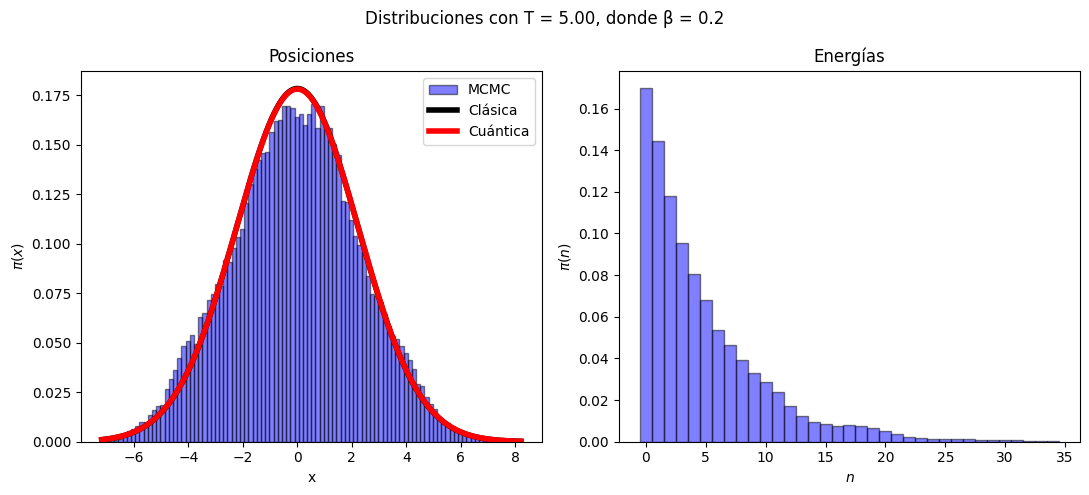

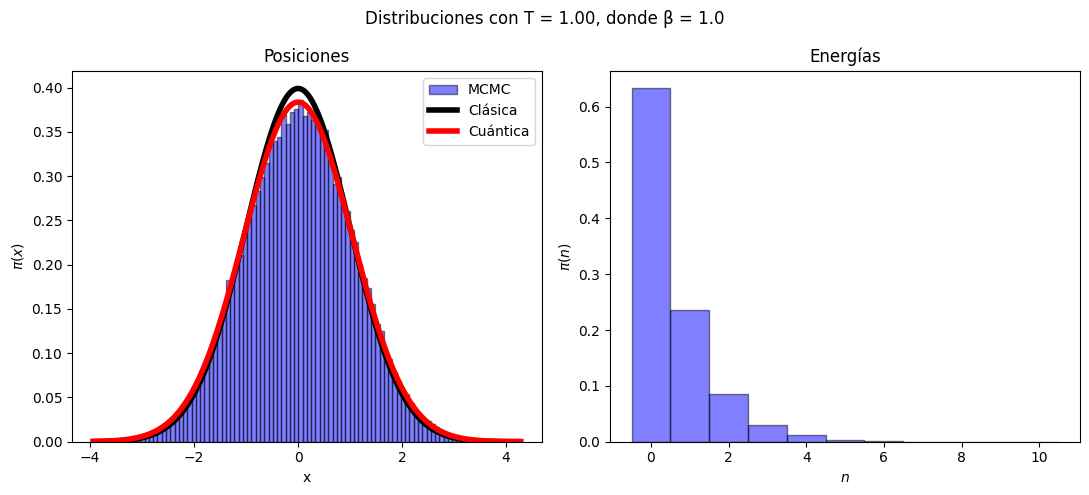

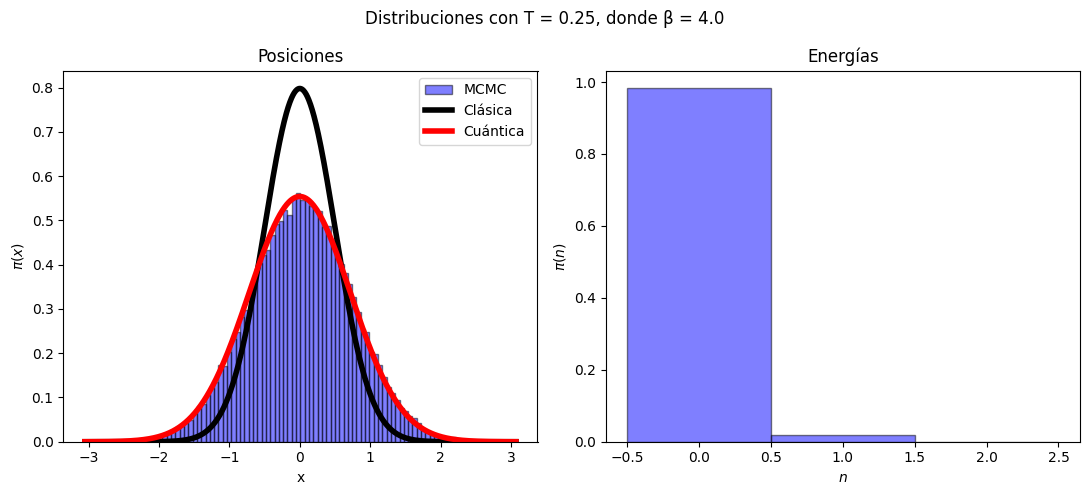

In [ ]:
beta_values = [0.2 , 1.0 , 4.0]
# Instanciamos las clases para los valores de beta a estudiar
qho_ = QuantumHarmonicOscillator(beta_x=beta_values[0])
qho_2 = QuantumHarmonicOscillator(beta_x=beta_values[1])
qho_3 = QuantumHarmonicOscillator(beta_x=beta_values[2])

# Ejecutamos y graficamos las distribuciones de posici√≥n y energ√≠a
qho_.plot_distributions()
qho_2.plot_distributions()
qho_3.plot_distributions()


Los resultados muestran una excelente concordancia entre los histogramas simulados y las distribuciones cu√°nticas te√≥ricas. Para
$ùõΩ =5 $ (temperatura baja), el sistema se encuentra mayoritariamente en el estado fundamental, por lo que el histograma coincide pr√°cticamente con la distribuci√≥n del estado base $ |\psi_0(x)|^2$. A medida que disminuye
$ùõΩ$ (es decir, aumenta la temperatura), el sistema comienza a explorar estados excitados y la forma de la distribuci√≥n se ensancha, tal como predicen las expresiones anal√≠ticas.

En el caso de  $ùõΩ = 1$, se observa una mezcla notable entre varios niveles energ√©ticos. El histograma mantiene una forma gaussiana, pero con una anchura mayor en comparaci√≥n con el caso a temperatura baja. Finalmente, para
$ ùõΩ = 0.2$ (alta temperatura), la distribuci√≥n tiende hacia la forma cl√°sica, dominada por la funci√≥n $exp(\frac{-\beta x^2}{2})$, lo que evidencia una transici√≥n desde un comportamiento cu√°ntico dominado por la cuantizaci√≥n de niveles hacia un r√©gimen cl√°sico de equilibrio t√©rmico.

Este an√°lisis confirma que el algoritmo implementado reproduce correctamente tanto los efectos cu√°nticos como la transici√≥n hacia el l√≠mite cl√°sico al aumentar la temperatura, validando su utilidad como herramienta de simulaci√≥n en sistemas estad√≠sticos cu√°nticos.

Por otro lado, notemos que es posible ajustar la temperatura del ba√±o t√©rmico para favorecer la ocupaci√≥n de un nivel de energ√≠a excitado espec√≠fico, aunque con ciertas limitaciones inherentes a la naturaleza estad√≠stica del sistema cu√°ntico. En un oscilador arm√≥nico cu√°ntico, la probabilidad de que la part√≠cula se encuentre en un estado $ n $ a temperatura finita est√° dada por:

$$
P_n \propto \exp(-\beta E_n), \quad \text{con } E_n = \left(n + \frac{1}{2}\right).
$$

Esto implica que al disminuir la temperatura (es decir, al aumentar $ \beta $), los estados de energ√≠a m√°s bajos se vuelven m√°s probables, mientras que los estados m√°s excitados se suprimen exponencialmente. Sin embargo, para valores intermedios de $ \beta $, se puede observar una mayor recurrencia relativa de ciertos niveles excitados, especialmente si se elige una temperatura tal que el peso de Boltzmann $ \exp(-\beta E_n) $ tenga un valor comparable al de los niveles cercanos.

Por tanto, no se puede forzar una ocupaci√≥n exclusiva de un nivel excitado, pero s√≠ se puede encontrar una ventana de temperatura en la cual ese nivel tenga una mayor probabilidad relativa frente a otros niveles cercanos. Este fen√≥meno puede aprovecharse para "sintonizar" el sistema t√©rmico y estudiar con mayor resoluci√≥n el comportamiento estad√≠stico de estados excitados espec√≠ficos.


Ahora si analizamos la distribuci√≥n del histograma de energ√≠a podemos observar que  el ancho  est√° directamente relacionado con la dispersi√≥n de los estados energ√©ticos que la part√≠cula puede ocupar a una temperatura dada.

A bajas temperaturas (valores altos de $ \beta $), la distribuci√≥n de energ√≠as se concentra alrededor del estado fundamental. Esto se refleja en un histograma angosto y una FWHM peque√±a, ya que el sistema accede principalmente al nivel $ n = 0 $ debido a que los niveles excitados son fuertemente penalizados por el factor de Boltzmann.

Por el contrario, al aumentar la temperatura (disminuir $ \beta $), se incrementa la probabilidad de ocupaci√≥n de estados excitados, lo que ensancha la distribuci√≥n de energ√≠as y, en consecuencia, su FWHM. Esta tendencia se puede entender a partir de la distribuci√≥n de probabilidad.

Esto implica que la FWHM crece con la temperatura, ya que un mayor n√∫mero de estados $ n $ contribuye de manera significativa a la estad√≠stica del sistema. Esta evoluci√≥n es evidente al observar los histogramas de energ√≠a obtenidos para distintos valores de $\beta $:


* Para $ \beta = 5 $, el histograma est√° fuertemente concentrado en el estado base.
* Para $ \beta = 1 $, se observa una distribuci√≥n m√°s dispersa, con una mezcla apreciable de varios niveles excitados.
* Para $ \beta = 0.2 $, la distribuci√≥n se extiende ampliamente, reflejando un r√©gimen altamente t√©rmico donde m√∫ltiples niveles est√°n ocupados con probabilidades similares.


Este an√°lisis demuestra que la FWHM act√∫a como un buen indicador de la "actividad t√©rmica" del sistema y permite estudiar la transici√≥n entre el r√©gimen cu√°ntico y el cl√°sico a trav√©s del ensanchamiento de la distribuci√≥n de energ√≠a.


A partir de los histogramas obtenidos en las distintas simulaciones, se pueden extraer varias conclusiones importantes sobre el comportamiento estad√≠stico y cu√°ntico del sistema:


* A temperatura cero $ T \to 0 $, o $ \beta \to \infty $, el histograma de posiciones coincide con la densidad de probabilidad del estado fundamental, mostrando una distribuci√≥n gaussiana centrada en $ x = 0 $. Esto valida tanto la formulaci√≥n te√≥rica del oscilador arm√≥nico cu√°ntico como la correcta implementaci√≥n del algoritmo de Metropolis.

* A temperatura finita, los histogramas de posici√≥n muestran un ensanchamiento progresivo a medida que disminuye $ \beta $, indicando que el sistema comienza a poblar niveles excitados. Esta evoluci√≥n se refleja tambi√©n en los histogramas de energ√≠a, que se vuelven m√°s anchos y distribuidos sobre varios niveles, lo que es consistente con el principio de distribuci√≥n de Boltzmann.

* Se observa una transici√≥n gradual desde un comportamiento cu√°ntico dominante, con ocupaci√≥n del estado fundamental, hacia un r√©gimen cl√°sico donde la distribuci√≥n de posiciones y energ√≠as se asemeja a las funciones gaussianas derivadas de la estad√≠stica cl√°sica. Este cruce de reg√≠menes es especialmente visible al comparar los histogramas simulados con las distribuciones te√≥ricas exactas.

* Finalmente, los histogramas proporcionan una representaci√≥n intuitiva y visual del equilibrio t√©rmico en sistemas cu√°nticos, permitiendo estudiar no solo la forma funcional de las distribuciones, sino tambi√©n c√≥mo la temperatura afecta la estructura probabil√≠stica del sistema.



Por √∫ltimo estudiemos que ocurre si modificamos el poso a estudiar, por ejemplo si ahora consideramos el problema de un pozo cu√°ntico infinito de potencial con ba√±o t√©rmico, en lugar de un oscilador arm√≥nico.

Para esto se procede a modificar la clase construida en el estudio anterior buscando solucionar el problema de un pozo cu√°ntico infinito de potencial con ba√±o t√©rmico, en lugar de un oscilador arm√≥nico.

Para esto se debe tener en cuenta que la funci√≥n de onda en un pozo infinito de potencial unidimensional de ancho $L$ y con condiciones de frontera $\psi(0)=\psi(L)=0$ esta dada por la siguiente expresi√≥n:

$$
\psi_n(x)=\sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L})
$$

donde los autovalores de energ√≠a o valores de energ√≠a discreta posibles estan dados por:

$$
E_n=\frac{n^2\pi^2\hbar^2}{2mL^2}
$$
Para este caso tomaremos por simplicidad unidades normalizadas, es decir $m=\hbar=1$.

Por otro lado, para el calculo de la distribucion de probabilidad teorica ,como se ha discutido anteriormente, esta dada por:

$$
\pi(x)= \frac{1}{Z}\sum_{n=1}^{\infty} e^{-\beta E_n} |\psi_n(x)|^2
$$

Donde $Z$ es la funci√≥n de partici√≥n can√≥nica para un recerborio termico y viene dada teoricamente por la expresi√≥n:

$$
Z=\sum_{n=1}^{\infty}e^{-\beta E_n}= \sum_{n=1}^{\infty}e^{-\beta\frac{\pi^2n^2}{2L^2}}
$$


En la siguiente celda de c√≥digo  se aprecia la clase constructora denominada `InfinitePotentialWell` por su nombre en ingl√©s, correspondiente al caso de poso infinito de potencial considerado, partiendo de un $\beta$ dado ($\beta=\frac{1}{T}$). Entre sus m√©todos m√°s importantes estan:

*  `wavefunction`:  nos permite construir la funci√≥n de onda en el estado de energ√≠a $n$ requerido

* `energy`: dado un nivel $n$ retorna el autovalor de energ√≠a de este nivel.

* `theoretical_probability_distribution`: Permite construir teoricamente la funci√≥n de distribuci√≥n de probabilidad la cual es usada en el gr√°fico comparativo.

* `run_metropolis_mcmc`: ejecuta la evoluci√≥n del sistema en la cantidad de pasos indicados (`n_steps).

* `plot_distributions`: Gr√°fica el histograma de posiciones y de energ√≠a encontrados para la temperatura dada.


In [ ]:
class InfinitePotentialWell:
    def __init__(self, beta_x, L=1.0, delta=0.05, n_steps=100000, max_state=20):
        self.beta_x = beta_x
        self.L = L
        self.delta = delta
        self.n_steps = n_steps
        self.max_state = max_state  # N√∫mero m√°ximo de estados para suma te√≥rica

    def wavefunction(self, x, n):
        if 0 < x < self.L:
            return np.sqrt(2 / self.L) * np.sin(n * np.pi * x / self.L)
        else:
            return 0.0

    def energy(self, n):
        return (n * np.pi / self.L)**2 / 2

    def partition_function(self,max_state):
      return sum(np.exp(-self.beta_x * self.energy(n)) for n in range(1, max_state + 1))

    def theoretical_probability_distribution(self, x_vals):
        Z = self.partition_function(self.max_state)
        pi_x = np.zeros_like(x_vals)

        for n in range(1, self.max_state + 1):
            E_n = self.energy(n)
            psi_n_sq = np.array([self.wavefunction(x, n)**2 for x in x_vals])
            pi_x += np.exp(-self.beta_x * E_n) * psi_n_sq

        return pi_x / Z

    def run_metropolis_mcmc(self):
        x = self.L / 2
        n = 1
        samples = []

        for _ in range(self.n_steps):
            x_new = x + random.uniform(-self.delta, self.delta)
            if 0 < x_new < self.L:
                ratio = abs(self.wavefunction(x_new, n) / self.wavefunction(x, n))**2
                if random.uniform(0.0, 1.0) < min(1, ratio):
                    x = x_new

            n_new = n + (-1)**random.randint(0, 1)
            if n_new >= 1:
                E_old, E_new = self.energy(n), self.energy(n_new)
                psi_ratio = abs(self.wavefunction(x, n_new) / self.wavefunction(x, n))**2
                prob = psi_ratio * np.exp(-self.beta_x * (E_new - E_old))
                if random.uniform(0.0, 1.0) < min(1, prob):
                    n = n_new

            samples.append([x, n])

        return samples

    def plot_partition_convergence(self, max_states=100):
        """
        Grafica la convergencia de la funci√≥n de partici√≥n Z en funci√≥n del n√∫mero de estados incluidos.

        Par√°metros:
        - max_states: n√∫mero m√°ximo de estados considerados para mostrar convergencia.
        """
        Z_vals = []
        for N in range(1, max_states + 1):
            Z_N = self.partition_function(N)
            Z_vals.append(Z_N)

        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_states + 1), Z_vals, marker='o', lw=2)
        plt.xlabel("N√∫mero de estados incluidos (n)")
        plt.ylabel("Funci√≥n de partici√≥n acumulada $Z_n$")
        plt.title(f"Convergencia de $Z$ con Œ≤ = {self.beta_x}, L = {self.L}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_distributions(self):
        data = np.array(self.run_metropolis_mcmc())
        positions, levels = data[:, 0], data[:, 1]

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        # Histograma MCMC de posiciones
        ax[0].hist(positions, bins=100, density=True, alpha=0.5, color='blue', edgecolor='black', label='MCMC')

        # Distribuci√≥n te√≥rica
        x_vals = np.linspace(0, self.L, 1000)
        pi_x = self.theoretical_probability_distribution(x_vals)
        ax[0].plot(x_vals, pi_x, color='red', lw=2.5, label='Te√≥rica')

        ax[0].set_title('Distribuci√≥n de Posiciones')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel(r'$\pi(x)$')
        ax[0].legend()

        # Histograma de niveles de energ√≠a
        ax[1].hist(levels, bins=np.arange(0.5, max(levels)+1.5), density=True, alpha=0.6, color='green', edgecolor='black')
        ax[1].set_title('Distribuci√≥n de Energ√≠as')
        ax[1].set_xlabel('n')
        ax[1].set_ylabel(r'$\pi(n)$')

        plt.suptitle(f'Distribuciones MCMC vs. Te√≥rica (Pozo Infinito) con Œ≤ = {self.beta_x}, L = {self.L}')
        plt.tight_layout()
        plt.show()


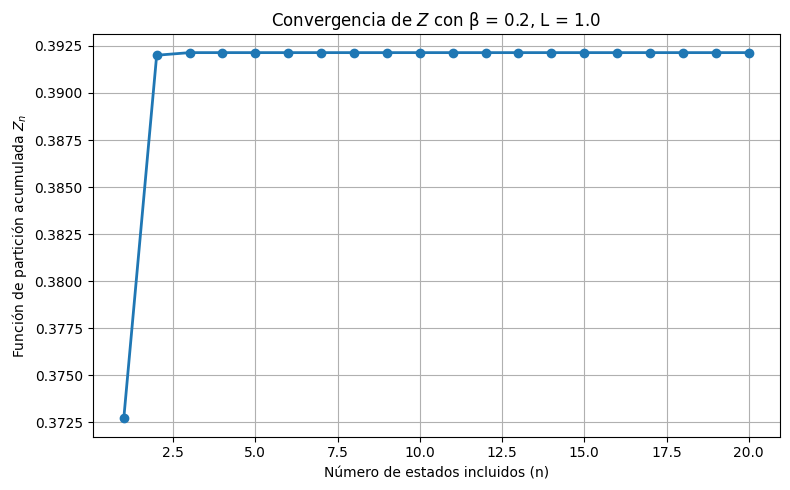

In [ ]:
model = InfinitePotentialWell(beta_x=0.2, L=1.0, delta=0.5, n_steps=100000)
model.plot_partition_convergence(max_states=20)

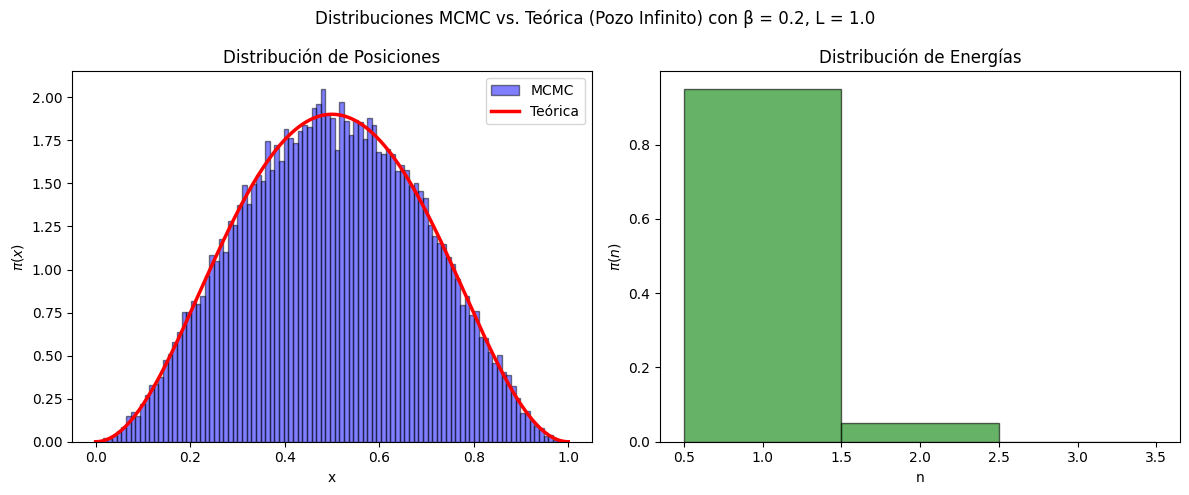

In [ ]:
model.plot_distributions()

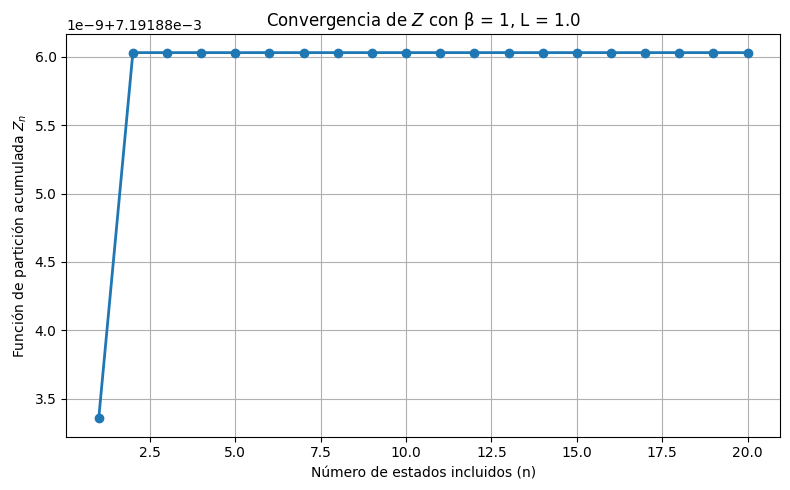

In [ ]:
model2 = InfinitePotentialWell(beta_x=1, L=1.0, delta=0.5, n_steps=100000)
model2.plot_partition_convergence(max_states=20)

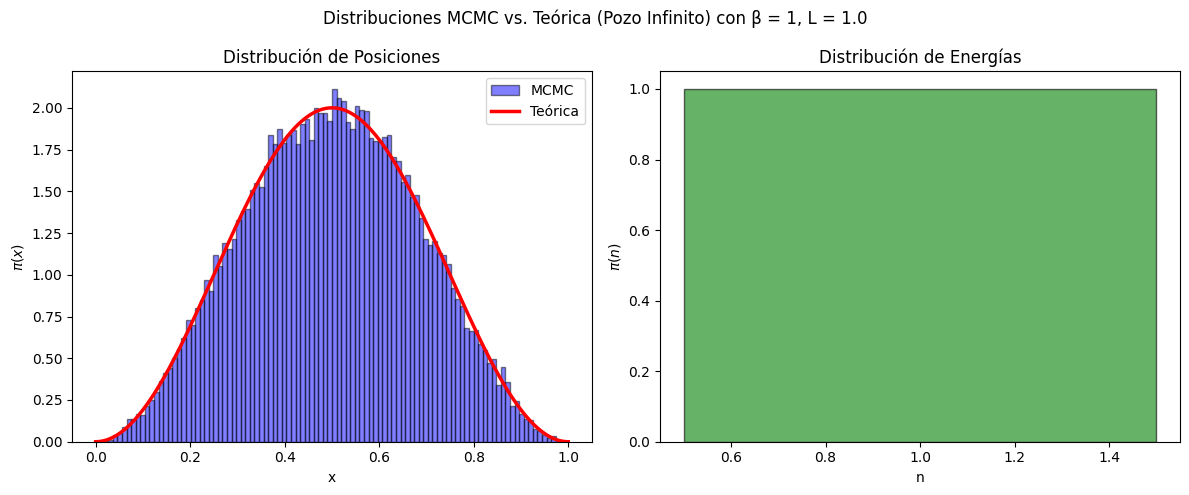

In [ ]:
model2.plot_distributions()

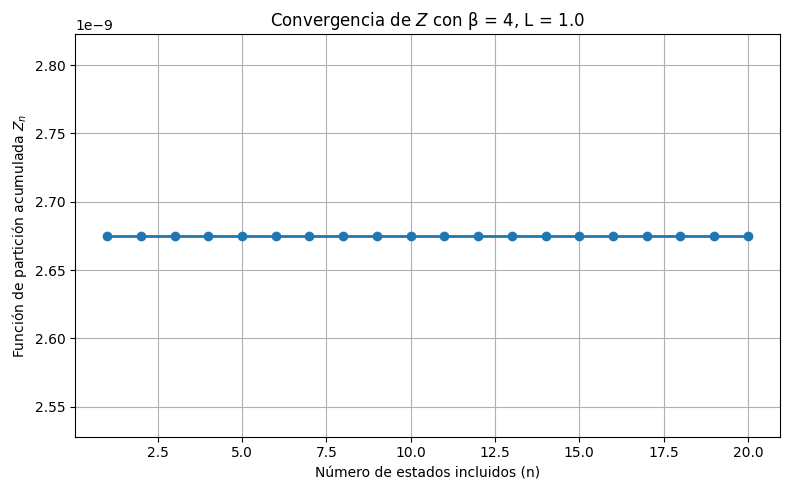

In [ ]:
model2 = InfinitePotentialWell(beta_x=4, L=1.0, delta=0.5, n_steps=100000)
model2.plot_partition_convergence(max_states=20)

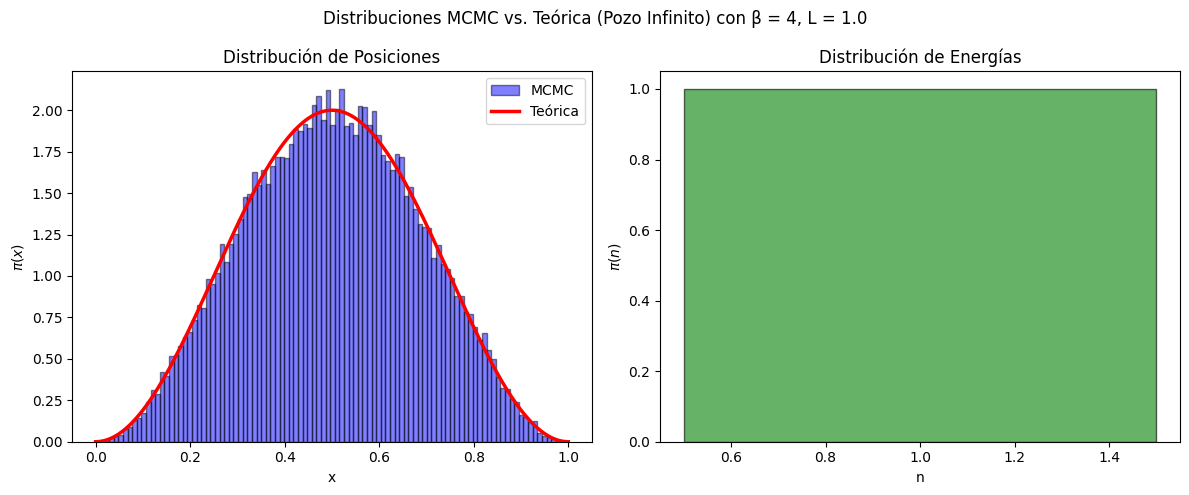

In [ ]:
model2.plot_distributions()

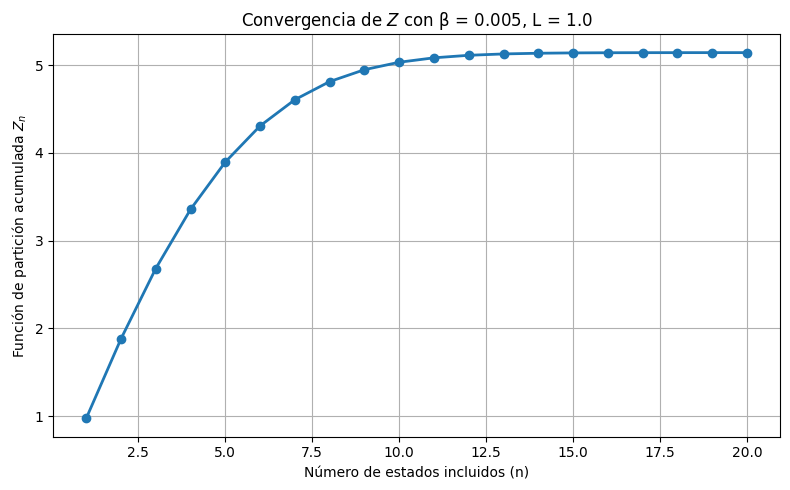

In [ ]:
model3 = InfinitePotentialWell(beta_x=0.005, L=1.0, delta=0.5, n_steps=100000)
model3.plot_partition_convergence(max_states=20)

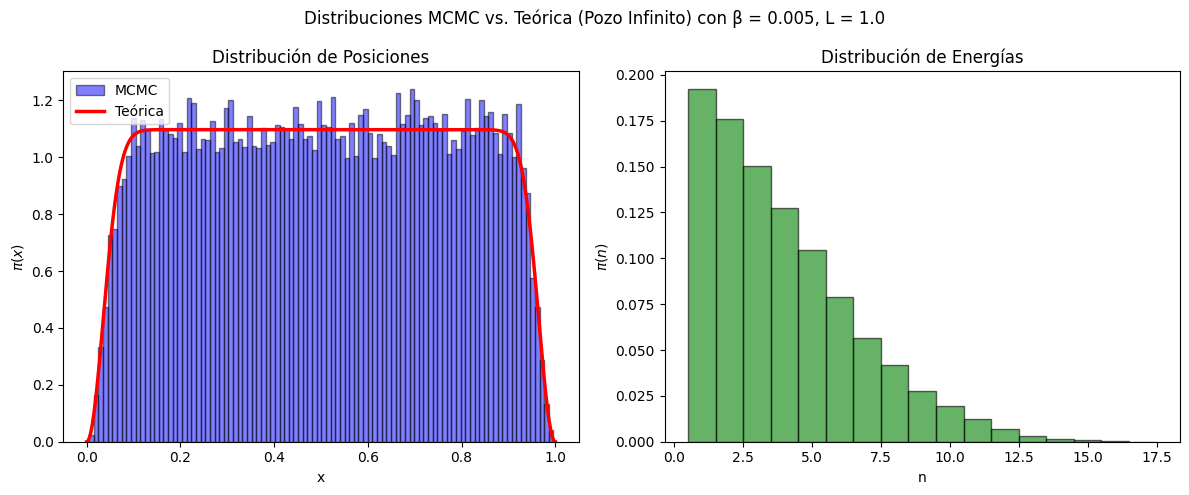

In [ ]:
model3.plot_distributions()

Al sustituir el potencial arm√≥nico por un pozo cu√°ntico infinito, el comportamiento t√©rmico del sistema cambia notablemente debido a la diferente estructura del espectro energ√©tico. En el pozo, los niveles est√°n dados por $ E_n \propto n^2 $, lo que provoca que a temperaturas altas se acceda m√°s f√°cilmente a estados muy excitados, aumentando significativamente la dispersi√≥n energ√©tica.

Los histogramas de posici√≥n en el pozo reflejan la forma oscilatoria de las funciones de onda $ \psi_n(x) \sim \sin\left(\frac{n\pi x}{L}\right) $, presentando nodos fijos en los bordes del intervalo y estructuras m√°s marcadas que en el caso arm√≥nico, donde predominan formas gaussianas suaves.

En conjunto, el sistema en el pozo cu√°ntico muestra una mayor sensibilidad t√©rmica y distribuciones de probabilidad m√°s estructuradas, lo que contrasta con el comportamiento m√°s regular y centrado del oscilador arm√≥nico. Esta comparaci√≥n destaca c√≥mo el tipo de potencial determina la respuesta t√©rmica y estad√≠stica del sistema.

# Conclusiones

En este trabajo se aplic√≥ con √©xito el m√©todo Monte Carlo de Metropolis para analizar sistemas cu√°nticos confinados, espec√≠ficamente una part√≠cula en un potencial arm√≥nico y en un pozo infinito. Las simulaciones permitieron reproducir con fidelidad las distribuciones de probabilidad tanto en el r√©gimen cu√°ntico como en el cl√°sico, evidenciando c√≥mo la temperatura afecta la din√°mica del sistema.

Para el oscilador arm√≥nico, los resultados mostraron una correspondencia exacta entre la distribuci√≥n a temperatura cero y el estado fundamental esperado, mientras que al aumentar la temperatura, la distribuci√≥n se aproxim√≥ progresivamente a un comportamiento cl√°sico. En el caso del pozo infinito, las simulaciones reflejaron la complejidad adicional introducida por el potencial, destacando la sensibilidad t√©rmica y la aparici√≥n de patrones estructurales en las distribuciones de posici√≥n y energ√≠a.

Estos hallazgos resaltan la utilidad del m√©todo Monte Carlo para capturar aspectos relevantes de sistemas cu√°nticos estad√≠sticos y aportan una visi√≥n detallada sobre el impacto de los efectos t√©rmicos en part√≠culas confinadas, fortaleciendo su aplicabilidad en el estudio de fen√≥menos cu√°nticos en diferentes potenciales.

# Agradecimientos

Se agradece al profesor Johans y al Instituto de F√≠sica por las herramientas conceptuales y computacionales brindadas para el desarrollo de esta tarea.